<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


r2_score is  0.8380160312048218


r2_score is  0.6877275233289917


r2_score is  0.7200139904487426


r2_score is  -35026.00325021042


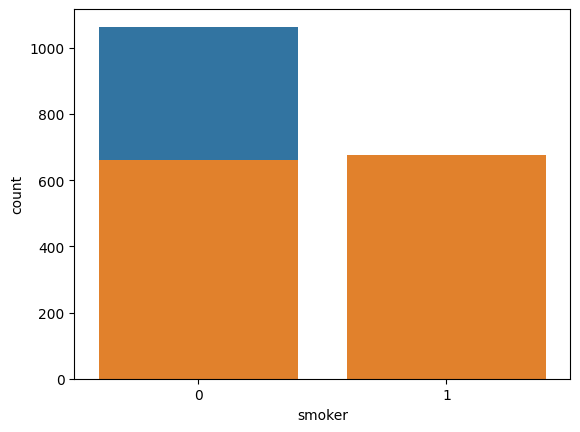

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('C:/Users/kalya/Projects/Medical Cost Prediction/data/insurance.csv')
data.head()
data.info()
data.shape
data.columns
from sklearn.preprocessing import LabelEncoder 
lab=LabelEncoder()
data['sex']=lab.fit_transform(data['sex'])
data['smoker']=lab.fit_transform(data['smoker'])
data['region']=lab.fit_transform(data['region'])
data.head()
sns.countplot(x='smoker',data=data)
sns.countplot(x='sex',data=data)
x=data.iloc[:,data.columns!='charges']
y=data.iloc[:,data.columns=='charges']
#x.shape
#x.head()
x.head()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score, roc_curve, auc
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)
xtrain.head()
ytrain.head()
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0) #N-estimators means how many time predict the value like that 
regressor.fit(xtrain, ytrain)
y_pred = regressor.predict(xtest)
#y_pred
from sklearn import metrics
from sklearn.metrics import r2_score
print("\n\nr2_score is " , r2_score(y_pred,ytest))
from sklearn.linear_model import LinearRegression
alg = LinearRegression()
alg.fit(xtrain, ytrain)
y_predict = alg.predict(xtest)
print("\n\nr2_score is " , r2_score(y_predict,ytest))
from sklearn import tree
dt=tree.DecisionTreeRegressor()
dt.fit(xtrain, ytrain)
x_predicted=dt.predict(xtest)
print("\n\nr2_score is " , r2_score(x_predicted,ytest))
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(xtrain, ytrain)
predicted=regressor.predict(xtest)
print("\n\nr2_score is " , r2_score(predicted,ytest))
test_vector = np.reshape(np.asarray([19,0,27.900,0,1,3]),(1,6))
p = int(regressor.predict(test_vector)[0])